In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "iiris1"

# **Data Science and Business Analytics**
The Sparks Foundation GRIP June 2023
# **By: Kush Vikas Ambre**
# **TASK 2: Prediction using Unsupervised ML**

From the given 'Iris' dataset , predict the optimum number of clusters and reprsent them visually. 

Steps to be performed:
# **Step 1 : Importing all the required libraries**

In [2]:
install.packages('cluster')
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
#Importing data 
iris <- read.csv('/kaggle/input/iiris1/Iris.csv')

In [4]:
#Performing EDA to know what's there in data
head(iris)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
str(iris)

'data.frame':	150 obs. of  6 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...


In [6]:
colSums(is.na(iris))

Id SepalLengthCm  SepalWidthCm PetalLengthCm  PetalWidthCm 
            0             0             0             0             0 
      Species 
            0

# **Step 2 : Removing the unused columns**

In [7]:
#Removing the column Species
ir_1 <- iris[,-6]
head(ir_1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5.1,3.5,1.4,0.2
2,2,4.9,3.0,1.4,0.2
3,3,4.7,3.2,1.3,0.2
4,4,4.6,3.1,1.5,0.2
5,5,5.0,3.6,1.4,0.2
6,6,5.4,3.9,1.7,0.4


In [8]:
#Removing the column Id
ir_2 <- ir_1[,-1]
head(ir_2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


# **Step 3 : Performing Kmeans**

In [9]:
set.seed(240) #setting seed
kmeans.re <- kmeans(ir_2 , centers = 3 , nstart = 20)
kmeans.re

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1      5.006000     3.418000      1.464000     0.244000
2      5.901613     2.748387      4.393548     1.433871
3      6.850000     3.073684      5.742105     2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.24040 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [10]:
kmeans.re$size

[1] 50 62 38

In [11]:
kmeans.re$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

In [12]:
kmeans.re$centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871
3,6.850000,3.073684,5.742105,2.071053


In [13]:
cm <- table(iris$Species , kmeans.re$cluster)
print(cm)

                 
                   1  2  3
  Iris-setosa     50  0  0
  Iris-versicolor  0 48  2
  Iris-virginica   0 14 36


# **Step 4 : Ploting the dots for Cluster**

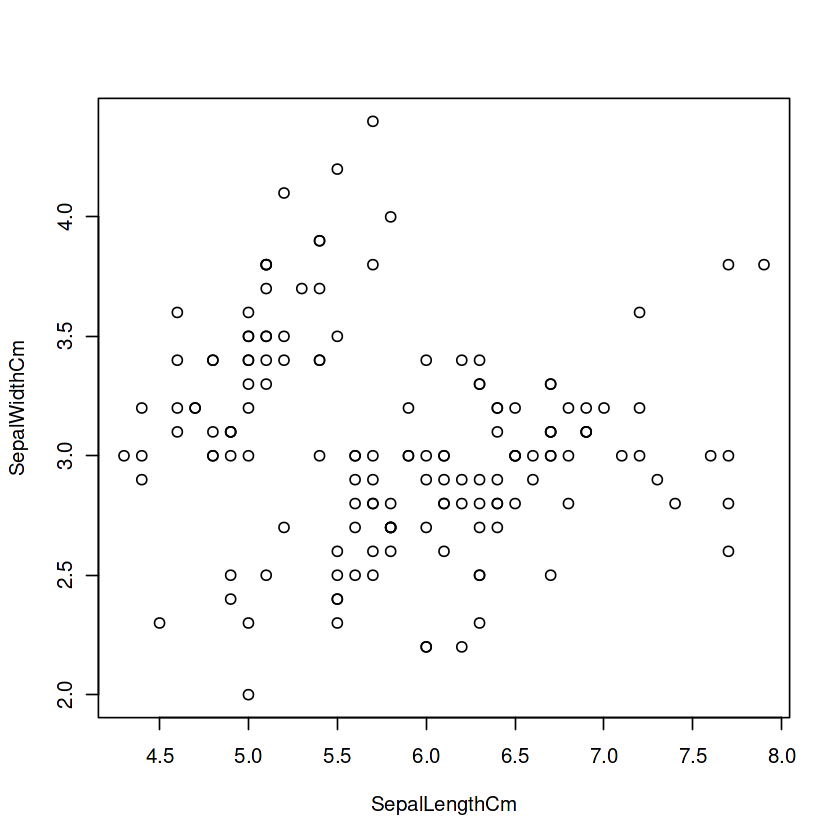

In [14]:
plot(ir_2[c("SepalLengthCm","SepalWidthCm")])

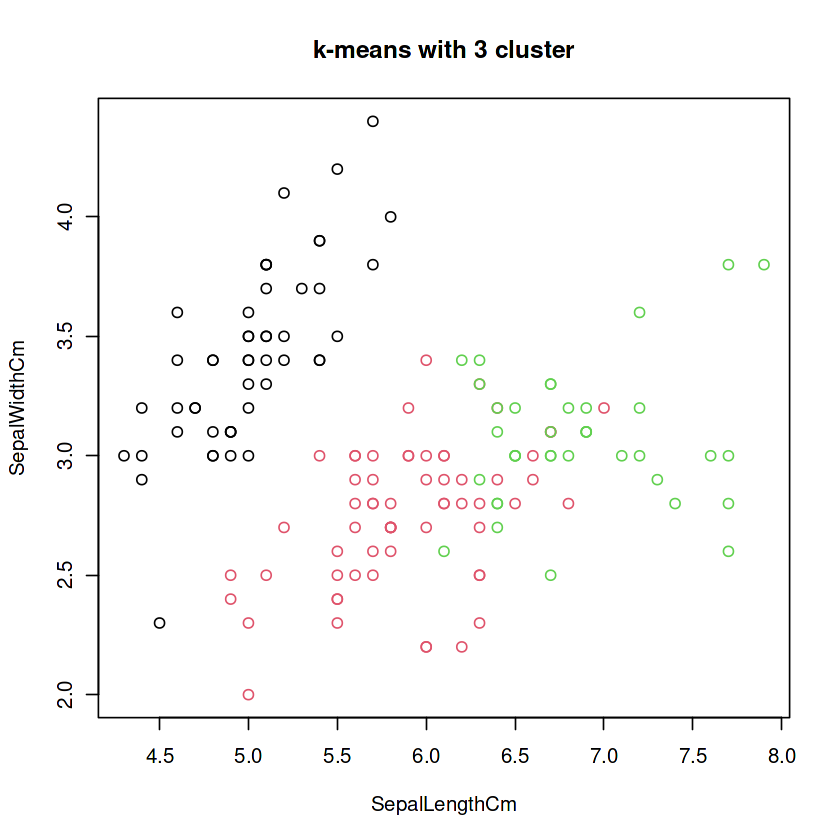

In [15]:

plot(ir_2[c("SepalLengthCm","SepalWidthCm")],
     col = kmeans.re$cluster,
     main = "k-means with 3 cluster")

# **Step 6 : Ploting Clusters**

In [16]:
y_kmeans <- kmeans.re$cluster

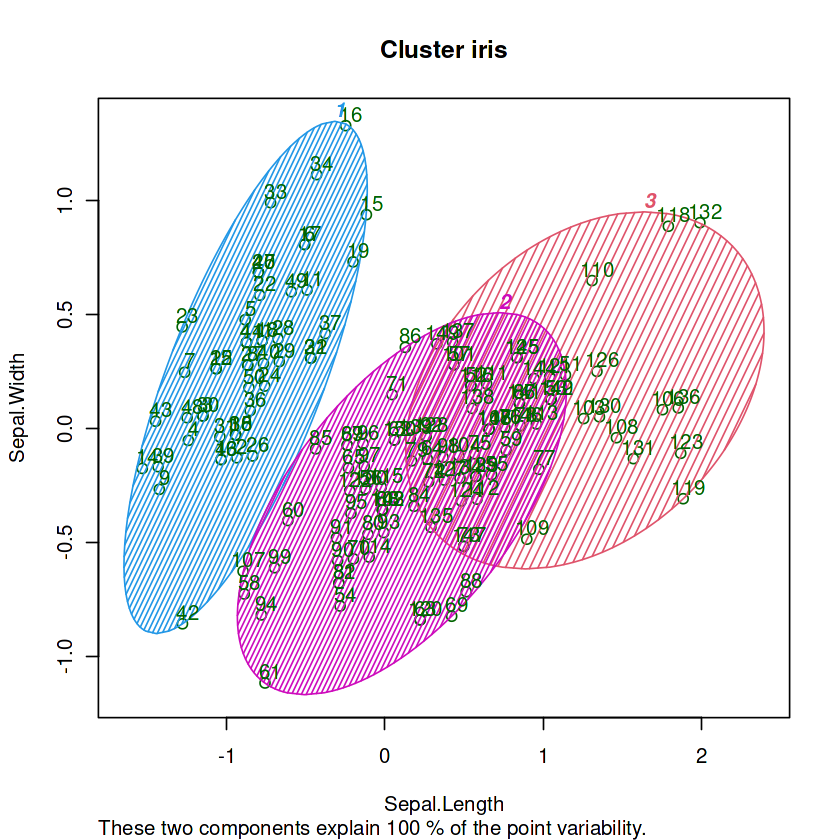

In [17]:
clusplot(ir_2[, c("SepalLengthCm","SepalWidthCm")],
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         label = 2,
         plotchar = FALSE,
         span = TRUE,
         main = "Cluster iris",
         xlab = "Sepal.Length",
         ylab = "Sepal.Width")

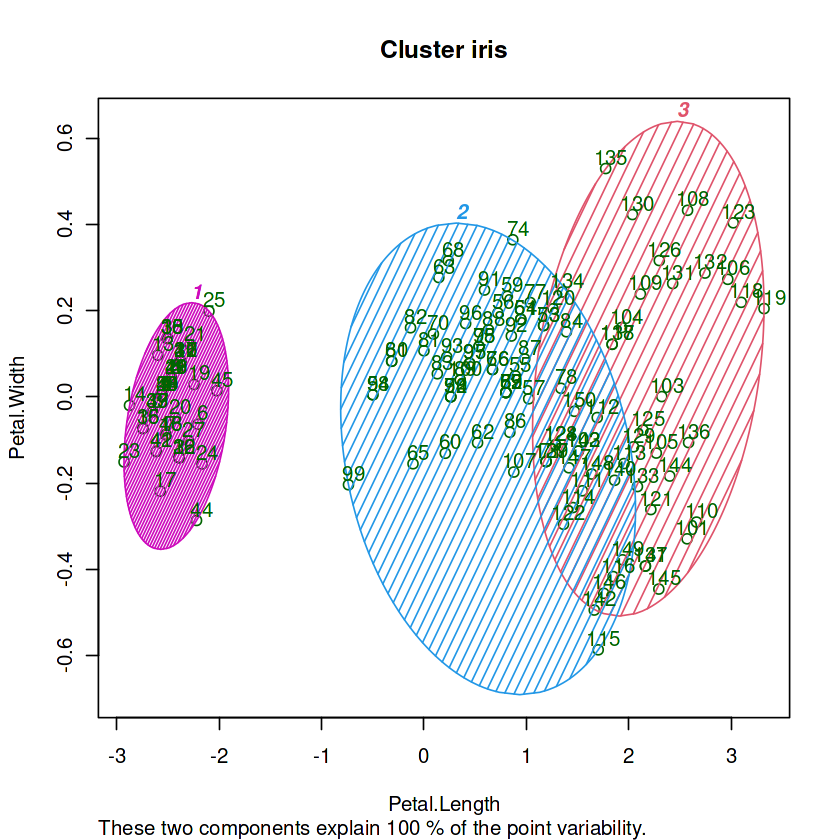

In [18]:
clusplot(ir_2[, c("PetalLengthCm","PetalWidthCm")],
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         label = 2,
         plotchar = FALSE,
         span = TRUE,
         main = "Cluster iris",
         xlab = "Petal.Length",
         ylab = "Petal.Width")